# Tensorflow Object Detection 

Cloning TensorFlow Object Detection API repository from GitHub and installing required python libraries

In [0]:
!git clone --quiet https://github.com/tensorflow/models.git
    
!apt-get install -qq protobuf-compiler python-tk

!pip install -q Cython contextlib2 pillow lxml matplotlib PyDrive

In [0]:
%cd /content/models/research

!protoc object_detection/protos/*.proto --python_out=.

import os
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/:/content/models/'

%cd object_detection

!wget http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
    
!tar xvzf faster_rcnn_inception_v2_coco_2018_01_28.tar.gz

/content/models/research
/content/models/research/object_detection
--2019-06-06 09:35:03--  http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.141.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149119618 (142M) [application/x-tar]
Saving to: ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz.1’

faster_rcnn_incepti 100%[===================>] 142.21M   180MB/s    in 0.8s    

2019-06-06 09:35:04 (180 MB/s) - ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz.1’ saved [149119618/149119618]

faster_rcnn_inception_v2_coco_2018_01_28/
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.index
faster_rcnn_inception_v2_coco_2018_01_28/checkpoint
faster_rcnn_inception_v2_coco_2018_01_28/pipeline.config
faster_rcnn_inception_v2_coco_2018_01_28/model

In [0]:
!wget http://ufldl.stanford.edu/housenumbers/train.tar.gz
!wget http://ufldl.stanford.edu/housenumbers/test.tar.gz
# !wget http://ufldl.stanford.edu/housenumbers/extra.tar.gz

--2019-06-06 09:35:13--  http://ufldl.stanford.edu/housenumbers/train.tar.gz
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 404141560 (385M) [application/x-gzip]
Saving to: ‘train.tar.gz’

train.tar.gz        100%[===================>] 385.42M  16.6MB/s    in 20s     

2019-06-06 09:35:33 (19.4 MB/s) - ‘train.tar.gz’ saved [404141560/404141560]

--2019-06-06 09:35:36--  http://ufldl.stanford.edu/housenumbers/test.tar.gz
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276555967 (264M) [application/x-gzip]
Saving to: ‘test.tar.gz’

test.tar.gz         100%[===================>] 263.74M  26.0MB/s    in 11s     

2019-06-06 09:35:47 (23.6 MB/s) - ‘test.tar.gz’ saved [276555967/2

In [0]:
!tar xvzf train.tar.gz
!tar xvzf test.tar.gz
# !tar xvzf extra.tar.gz

In [0]:
import os 
os.remove('train.tar.gz')
os.remove('test.tar.gz')
os.remove('faster_rcnn_inception_v2_coco_2018_01_28.tar.gz')
# os.remove('extra.tar.gz')

In [0]:
import glob
print('TRAIN IMAGES:', len(glob.glob('train/*.png')))
print('TEST IMAGES:', len(glob.glob('test/*.png')))
# print('EXTRA IMAGES:', len(glob.glob('extra/*.png')))

TRAIN IMAGES: 33402
TEST IMAGES: 13068


In [0]:
%cd ..
%cd ..
%cd ..
%cp mat_to_xml.py models/research/object_detection
%cp remove_erroneous_files.py models/research/object_detection
%cp xml_to_csv.py models/research/object_detection
%cp make_tfrecord.py models/research/object_detection
%cp label_map.pbtxt models/research/object_detection
%cp faster_rcnn_inception_v2_pets.config models/research/object_detection
%cd models/research/object_detection

/content/models/research
/content/models
/content
/content/models/research/object_detection


In [0]:
!python mat_to_xml.py --image_dir=train --mat_dir=train --mat_file_name=digitStruct.mat
!python mat_to_xml.py --image_dir=test --mat_dir=test --mat_file_name=digitStruct.mat
# !python mat_to_xml.py --image_dir=extra --mat_dir=extra --mat_file_name=digitStruct.mat

PASCAL VOC xml of 33402 images created
PASCAL VOC xml of 13068 images created


In [0]:
!python remove_erroneous_files.py --xml_dir=test
!python remove_erroneous_files.py --xml_dir=train

DONE
DONE


In [0]:
import os
if not os.path.exists('csv_files'):
    os.mkdir('csv_files')
!python3 xml_to_csv.py --xml_dir=test --output_dir=csv_files --filename=test.csv
!python3 xml_to_csv.py --xml_dir=train --output_dir=csv_files --filename=train.csv

test.csv created successfully
train.csv created successfully


In [0]:
!python make_tfrecord.py --csv_input=csv_files/train.csv --image_dir=train --output_path=train.record
!python make_tfrecord.py --csv_input=csv_files/test.csv --image_dir=test --output_path=test.record

Successfully created the TFRecords: /content/models/research/object_detection/train.record
Successfully created the TFRecords: /content/models/research/object_detection/test.record


In [0]:
%cp legacy/train.py .

In [0]:
!python3 train.py --logtostderr --train_dir=training/ --pipeline_config_path=faster_rcnn_inception_v2_pets.config

In [0]:
!python export_inference_graph.py --input_type image_tensor --pipeline_config_path faster_rcnn_inception_v2_pets.config \
--trained_checkpoint_prefix training/model.ckpt-46810 --output_directory infm8

In [0]:
%cd ..
%cd ..
%cd ..
%cp export.png models/research/object_detection
%cp export1.png models/research/object_detection
%cd models/research/object_detection

/content/models/research
/content/models
/content
/content/models/research/object_detection


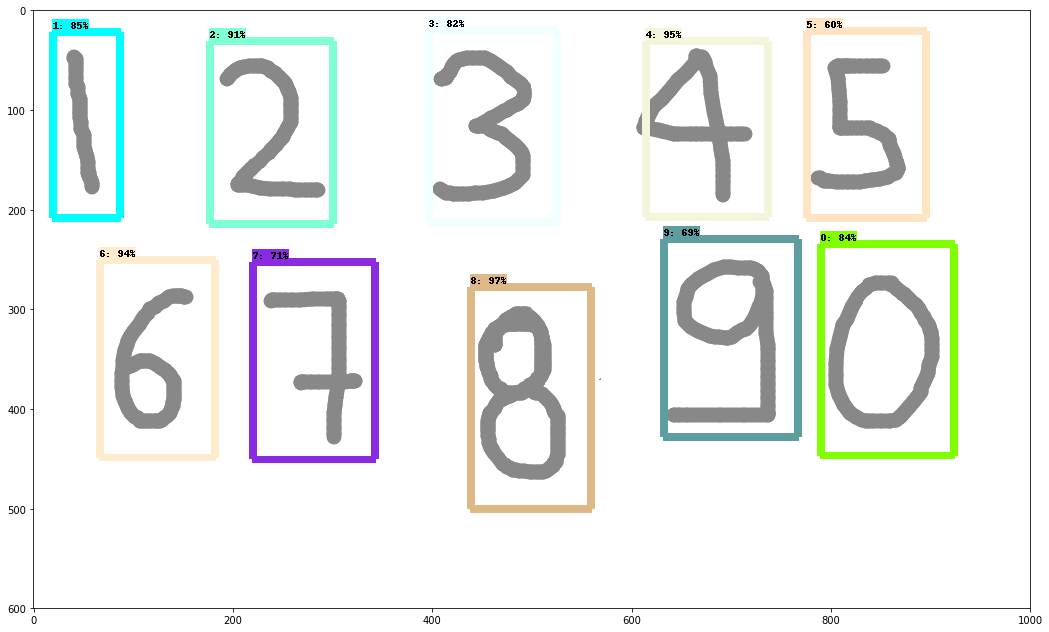

In [0]:
# Import packages
import os
import cv2
import numpy as np
import tensorflow as tf
import sys
import matplotlib.pyplot as plt

%matplotlib inline

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")

# Import utilites
from utils import label_map_util
from utils import visualization_utils as vis_util

# Name of the directory containing the object detection module we're using
MODEL_NAME = 'infm8'
IMAGE_NAME = 'export1.png'

# Grab path to current working directory
CWD_PATH = os.getcwd()

# Path to frozen detection graph .pb file, which contains the model that is used
# for object detection.
PATH_TO_CKPT = os.path.join(CWD_PATH, MODEL_NAME, 'frozen_inference_graph.pb')

# Path to label map file
PATH_TO_LABELS = os.path.join(CWD_PATH, 'label_map.pbtxt')

# Path to image
PATH_TO_IMAGE = os.path.join(CWD_PATH, IMAGE_NAME)

# Number of classes the object detector can identify
NUM_CLASSES = 10

# Load the label map.
# Label maps map indices to category names, so that when our convolution
# network predicts `5`, we know that this corresponds to `king`.
# Here we use internal utility functions, but anything that returns a
# dictionary mapping integers to appropriate string labels would be fine
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES,
                                                            use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Load the Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.Session(graph=detection_graph)

# Define input and output tensors (i.e. data) for the object detection classifier

# Input tensor is the image
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

# Output tensors are the detection boxes, scores, and classes
# Each box represents a part of the image where a particular object was detected
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

# Each score represents level of confidence for each of the objects.
# The score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

# Number of objects detected
num_detections = detection_graph.get_tensor_by_name('num_detections:0')

# Load image using OpenCV and
# expand image dimensions to have shape: [1, None, None, 3]
# i.e. a single-column array, where each item in the column has the pixel RGB value
image = cv2.imread(PATH_TO_IMAGE)
image_expanded = np.expand_dims(image, axis=0)

# Perform the actual detection by running the model with the image as input
(boxes, scores, classes, num) = sess.run(
    [detection_boxes, detection_scores, detection_classes, num_detections],
    feed_dict={image_tensor: image_expanded})

# Draw the results of the detection (aka 'visulaize the results')

vis_util.visualize_boxes_and_labels_on_image_array(
    image,
    np.squeeze(boxes),
    np.squeeze(classes).astype(np.int32),
    np.squeeze(scores),
    category_index,
    use_normalized_coordinates=True,
    line_thickness=8,
    min_score_thresh=0.60)

# All the results have been drawn on image. Now display the image.
plt.rcParams['figure.figsize'] = [18,11]
plt.imshow(image)
